In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\dtc-dr\data-analyse\continuous_factory_process.csv", delimiter=",")
prefixes_to_match = ['Machine1', 'Machine2' , 'Machine3', 'time_stamp']
filtered_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes_to_match)]
features = df[filtered_columns]
features = features.drop('time_stamp', axis=1) 
features

,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,...,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
0,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,10.48,436.76,...,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0
1,11.54,200,963.00,247,1246.09,72.0,72.3,48.03,10.48,436.77,...,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0
2,11.54,200,963.00,247,1246.29,72.0,72.3,48.16,10.48,425.46,...,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0
3,11.54,200,963.00,247,1247.59,72.0,72.3,48.57,10.48,437.01,...,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0
4,11.54,200,963.00,247,1252.83,72.1,72.4,48.57,10.48,425.18,...,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,12.21,424.53,...,433.18,205,195.22,78.0,78.1,337.50,12.04,248.18,74.9,64.9
14084,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,12.17,426.73,...,433.18,205,225.15,78.0,78.1,342.43,12.32,248.20,74.9,64.9
14085,12.22,201,1048.06,252,1257.52,72.0,71.8,73.59,12.14,429.77,...,433.18,205,210.46,78.0,78.1,334.89,12.18,248.92,74.9,64.9
14086,12.22,201,1048.06,252,1261.99,72.0,71.9,74.40,12.21,431.36,...,433.18,205,188.43,78.0,78.1,342.03,12.27,248.23,74.9,64.9


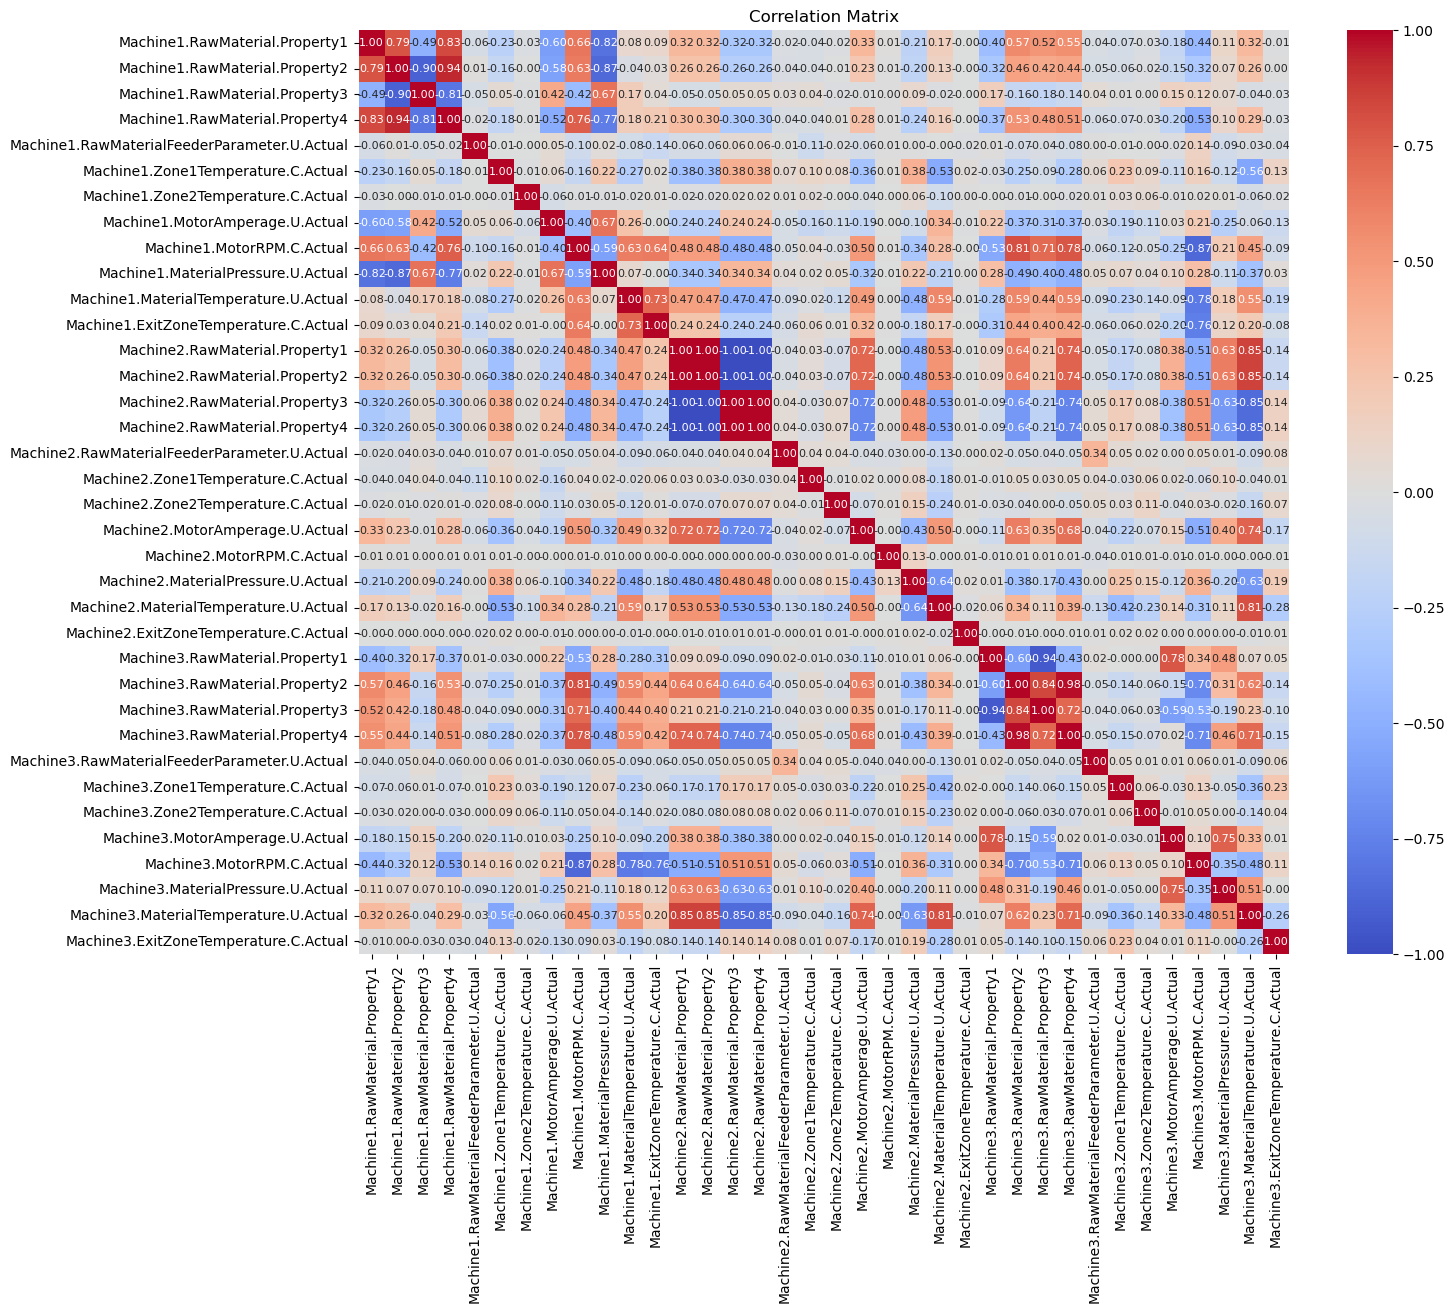

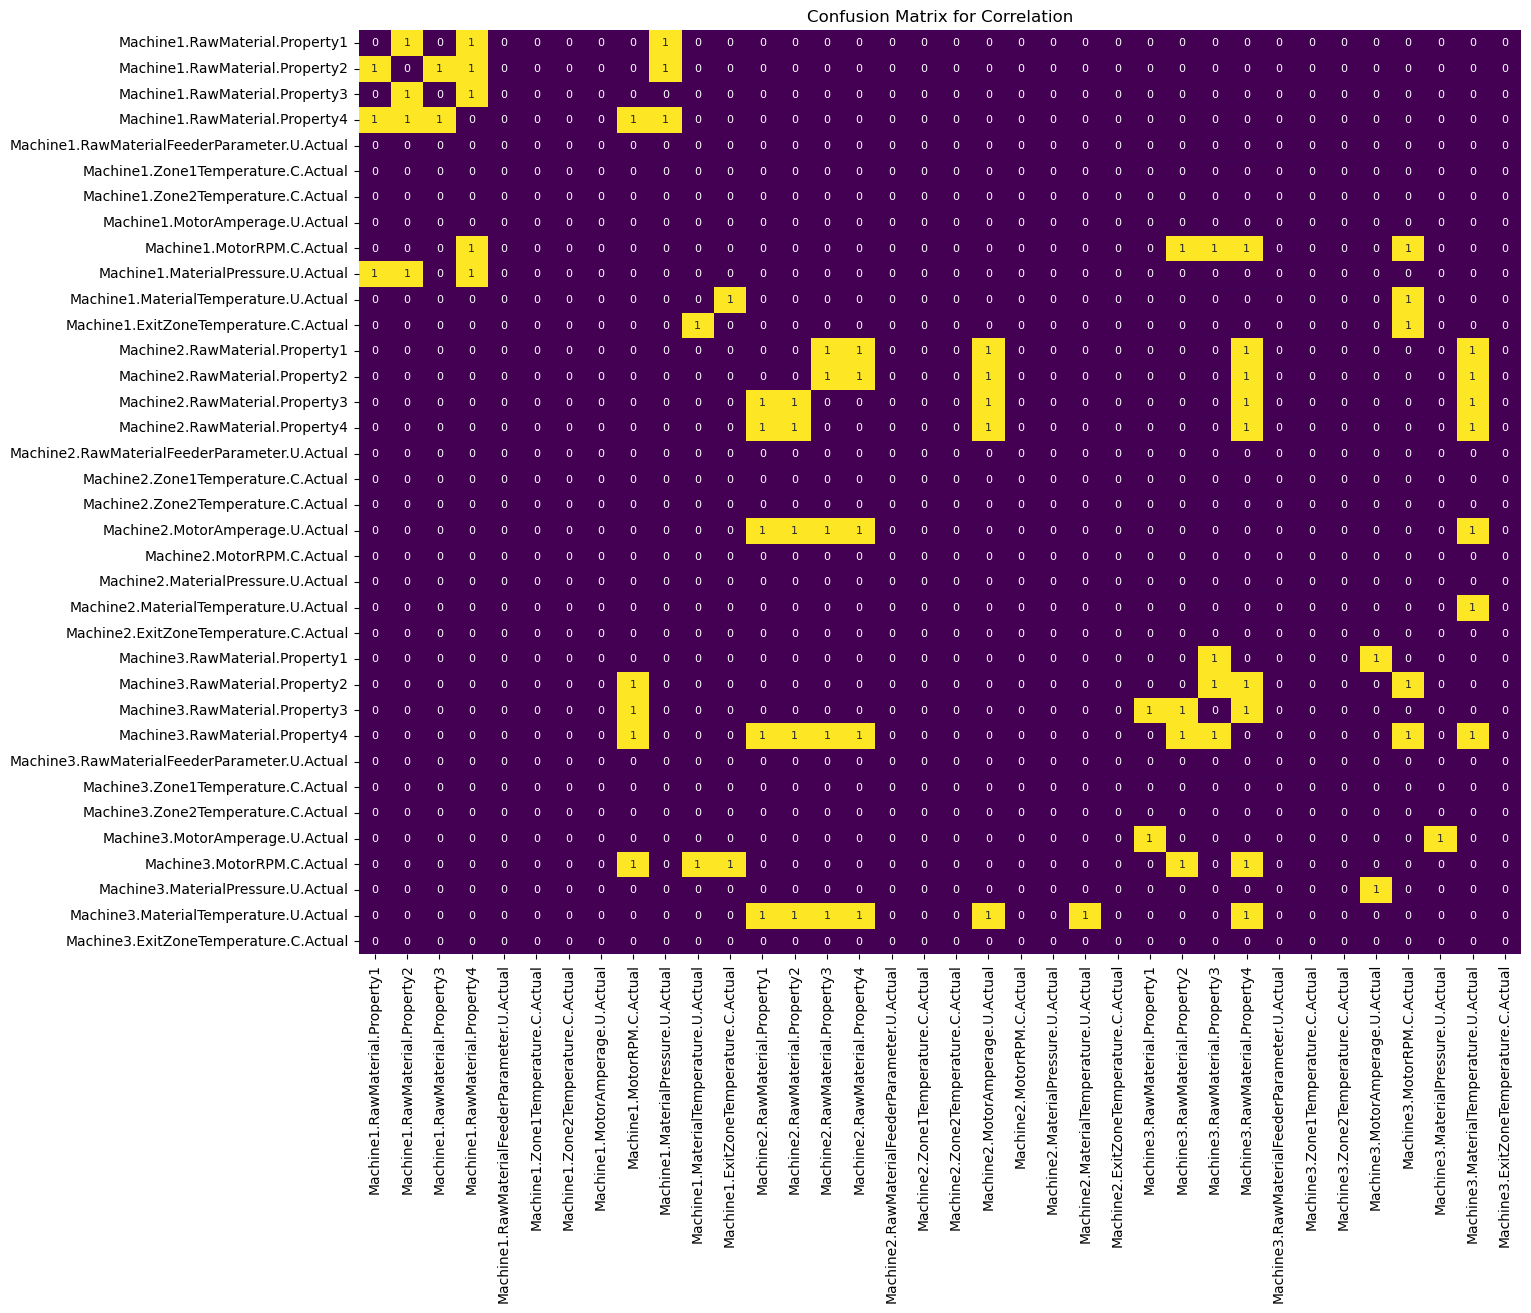

In [7]:
# Step 1: Check correlation
correlation_matrix = features.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix")

# Save the plot as an image file (e.g., PNG)
plt.savefig("correlation_matrix.png")

# Show the plot
plt.show()

# Step 3: Threshold for correlation
threshold = 0.7  # You can adjust this threshold based on your needs

# Step 4: Create a confusion matrix based on the threshold
confusion_matrix = (correlation_matrix.abs() > threshold) & (correlation_matrix < 1)

# Step 5: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed
sns.heatmap(confusion_matrix, annot=True, cmap="viridis", fmt=".1g", cbar=False, annot_kws={"size": 8})
plt.title("Confusion Matrix for Correlation")

# Save the plot as an image file (e.g., PNG)
# plt.savefig("confusion_matrix.png")

# Show the plot
plt.show()

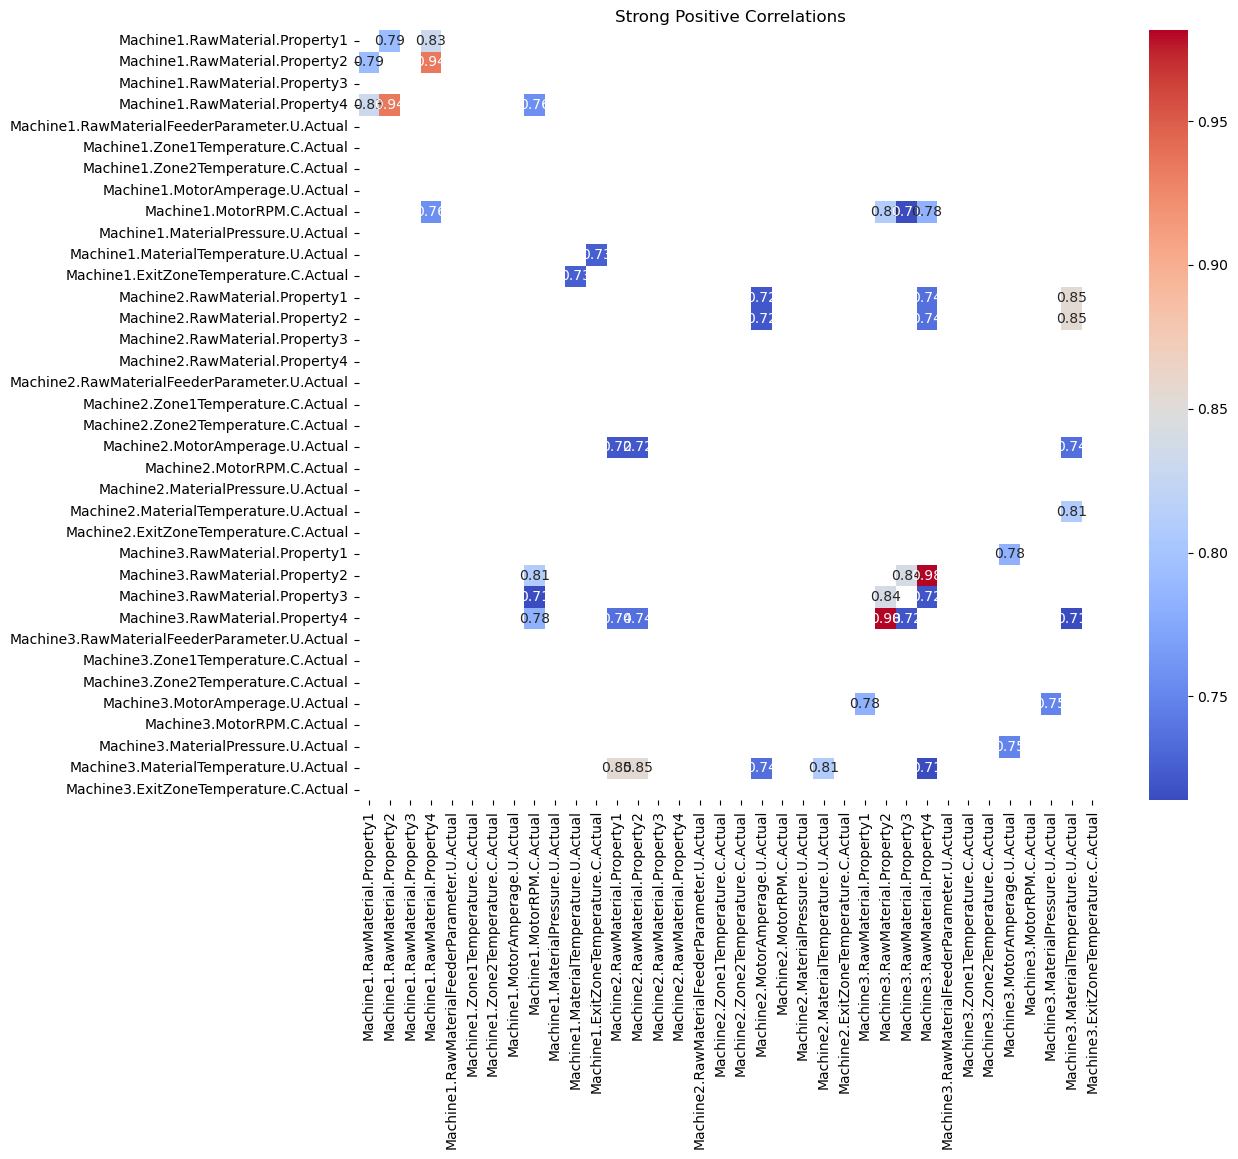

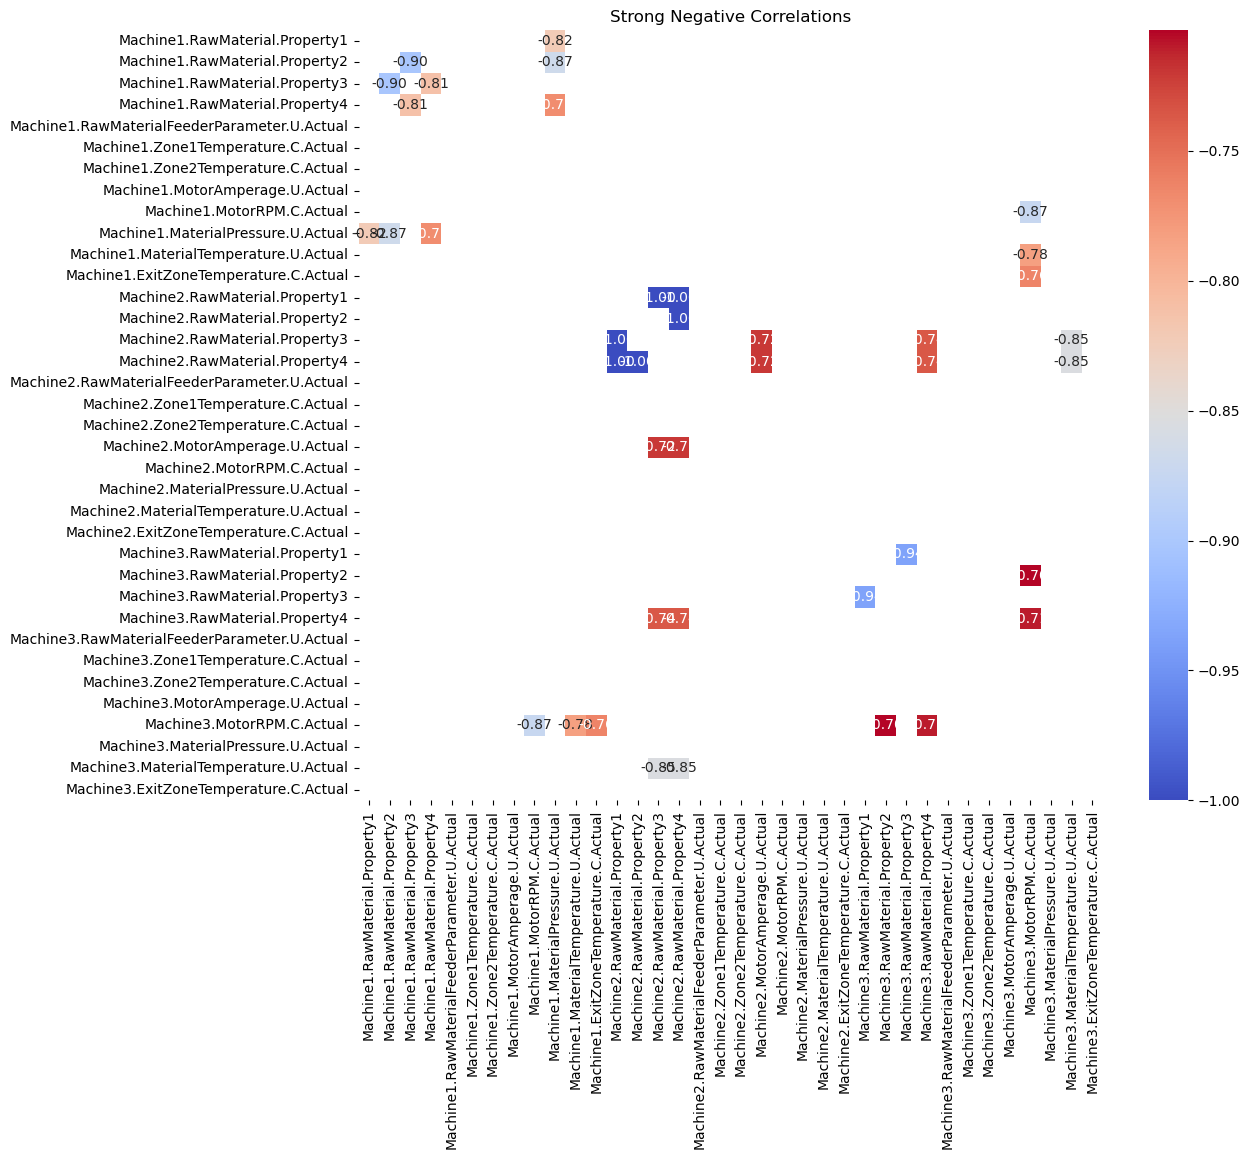

In [8]:
# Step 1: Check correlation
correlation_matrix = features.corr()

# Step 2: Set a threshold for strong correlation
strong_positive_threshold = 0.7
strong_negative_threshold = -0.7

# Step 3: Filter strong positive correlations
strong_positive_correlations = correlation_matrix[
    (correlation_matrix > strong_positive_threshold) & (correlation_matrix < 1)
]

# Step 4: Filter strong negative correlations
strong_negative_correlations = correlation_matrix[
    (correlation_matrix < strong_negative_threshold) & (correlation_matrix > -1)
]

# Step 5: Visualize strong positive correlations
plt.figure(figsize=(12, 10))
sns.heatmap(strong_positive_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Strong Positive Correlations")

# Save the plot as an image file (e.g., PNG)
# plt.savefig("strong_positive_correlations.png")

# Show the plot
plt.show()

# Step 6: Visualize strong negative correlations
plt.figure(figsize=(12, 10))
sns.heatmap(strong_negative_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Strong Negative Correlations")

# Save the plot as an image file (e.g., PNG)
# plt.savefig("strong_negative_correlations.png")

# Show the plot
plt.show()